In [41]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [42]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [43]:
NUM_CLASSES = 32

# Dataset reading

In [44]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [45]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [47]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [48]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_6 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │           352 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,422 (5.55 KB)

 Trainable params: 1,422 (5.55 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [50]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [51]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
171/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0738 - loss: 3.3897
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.0777 - loss: 3.3700 - val_accuracy: 0.2294 - val_loss: 2.6516
Epoch 2/1000
181/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1943 - loss: 2.6397
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1963 - loss: 2.6262 - val_accuracy: 0.4546 - val_loss: 1.8378
Epoch 3/1000
185/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2863 - loss: 2.1123
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2873 - loss: 2.1090 - val_accuracy: 0.5291 - val_loss: 1.5520
Epoch 4/1000
195/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3360 - loss: 1.9213
Epoch 4: saving model to model/keypoint_classifier/keypoint_classi

In [52]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8308 - loss: 0.6233


In [53]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [54]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[2.4964136e-01 2.4451638e-04 1.8324592e-10 1.2917144e-16 7.6483083e-08
 6.1480673e-06 4.7687568e-06 1.7480543e-05 9.2961855e-10 1.7477805e-07
 8.4717653e-04 3.8182005e-02 7.8093947e-04 4.3221721e-03 1.0909440e-04
 3.8653005e-02 1.3928951e-04 7.8020694e-11 2.2601096e-11 3.1185232e-09
 3.1468605e-07 9.4947055e-02 2.4465447e-08 5.9409667e-02 2.0581111e-02
 8.0355898e-07 9.1691458e-05 4.3935478e-01 2.1979064e-02 8.5754995e-04
 5.7513150e-04 2.9254528e-02]
27


# Confusion matrix

261/261 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


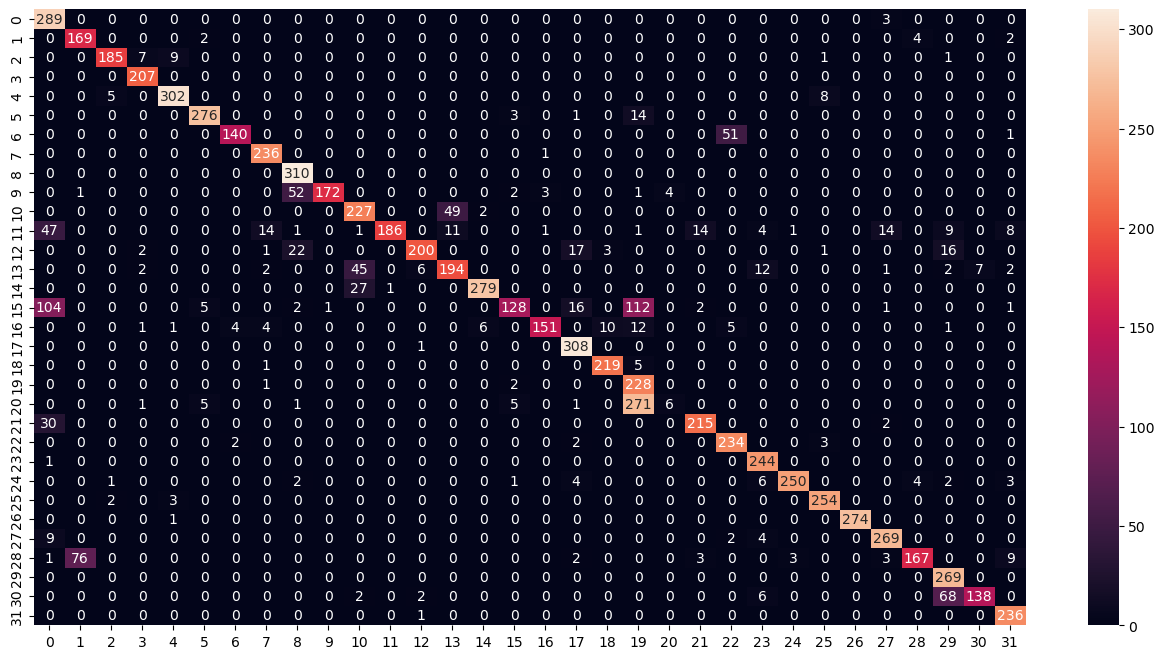

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.99      0.75       292
           1       0.69      0.95      0.80       177
           2       0.96      0.91      0.93       203
           3       0.94      1.00      0.97       207
           4       0.96      0.96      0.96       315
           5       0.96      0.94      0.95       294
           6       0.96      0.73      0.83       192
           7       0.91      1.00      0.95       237
           8       0.79      1.00      0.89       310
           9       0.99      0.73      0.84       235
          10       0.75      0.82      0.78       278
          11       0.99      0.60      0.75       312
          12       0.95      0.76      0.85       262
          13       0.76      0.71      0.74       273
          14       0.97      0.91      0.94       307
          15       0.91      0.34      0.50       372
          16       0.97      0.77      0.86       195
     

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(16, 8))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [56]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [57]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\phoen\AppData\Local\Temp\tmpkauprqr8\assets


INFO:tensorflow:Assets written to: C:\Users\phoen\AppData\Local\Temp\tmpkauprqr8\assets


Saved artifact at 'C:\Users\phoen\AppData\Local\Temp\tmpkauprqr8'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 32), dtype=tf.float32, name=None)
Captures:
  2017311220816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2017311221584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2017311217360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2017311212560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2017311221968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2017311218896: TensorSpec(shape=(), dtype=tf.resource, name=None)


7864

# Inference test

In [58]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

c:\Users\phoen\anaconda3\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [59]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [60]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [61]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [62]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[2.4964139e-01 2.4451734e-04 1.8324524e-10 1.2917096e-16 7.6483090e-08
 6.1480741e-06 4.7687572e-06 1.7480528e-05 9.2962033e-10 1.7477856e-07
 8.4717624e-04 3.8181987e-02 7.8093924e-04 4.3221707e-03 1.0909421e-04
 3.8653027e-02 1.3928952e-04 7.8020847e-11 2.2601013e-11 3.1185237e-09
 3.1468670e-07 9.4947055e-02 2.4465448e-08 5.9409577e-02 2.0581100e-02
 8.0355829e-07 9.1691290e-05 4.3935484e-01 2.1979120e-02 8.5755001e-04
 5.7513150e-04 2.9254545e-02]
27
